In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [3]:
trainset = torchvision.datasets.FashionMNIST("/data/rrjin/corpus_data", download=True, train=True, transform=transform)

In [4]:
testset = torchvision.datasets.FashionMNIST("/data/rrjin/corpus_data", download=True, train=False, transform=transform)

In [5]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

In [6]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

In [7]:
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

In [8]:
import matplotlib

In [9]:
matplotlib.colors.Colormap.is_gray

<function matplotlib.colors.Colormap.is_gray(self)>

In [10]:
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [11]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [12]:
net = Net()

In [13]:
criterion = nn.CrossEntropyLoss()

In [14]:
test_inputs = torch.rand(size=(3, 5), requires_grad=True)

In [15]:
test_target = torch.empty(size=(3, ), dtype=torch.long)

In [16]:
test_target

tensor([140165472778344,  94476646051664,               0])

In [17]:
test_target.random_(to=5)

tensor([0, 2, 3])

In [18]:
test_inputs

tensor([[0.3982, 0.1868, 0.0692, 0.5056, 0.3700],
        [0.3090, 0.9699, 0.6408, 0.5046, 0.3389],
        [0.3148, 0.0810, 0.1375, 0.9340, 0.7513]], requires_grad=True)

In [19]:
criterion(test_inputs, test_target)

tensor(1.4197, grad_fn=<NllLossBackward>)

In [20]:
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [21]:
from torch.utils.tensorboard import SummaryWriter

In [22]:
writer = SummaryWriter("/data/rrjin/run/fashion_mnist_experiment_1")

In [23]:
dataiter = iter(trainloader)

In [24]:
images, labels = next(dataiter)

In [25]:
images

tensor([[[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          ...,
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ..., -1., -1., -1.]]],


        [[[-1., -1., -1.,  ..., -1., -1., -1.],
          [-1., -1., -1.,  ...,

In [26]:
img_grid = torchvision.utils.make_grid(images)

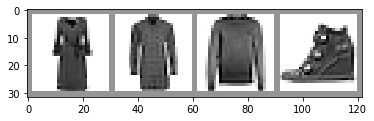

In [27]:
matplotlib_imshow(img_grid, one_channel=True)

In [28]:
writer.add_image("four_fashion_mnist_images", img_grid)

In [29]:
writer.add_graph(net, images)

In [30]:
writer.close()

In [31]:
trainset

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: /data/rrjin/corpus_data
    Split: Train

In [32]:
type(trainset.data)

torch.Tensor

In [33]:
torch.randperm(4)

tensor([1, 3, 2, 0])

In [34]:
def select_n_random(data, labels, n = 100):
    
    assert len(data) == len(labels)
    
    perm = torch.randperm(len(data))
    
    return data[perm][:n], labels[perm][:n]

In [35]:
images, labels = select_n_random(trainset.data, trainset.targets)

In [36]:
class_labels = [classes[lab] for lab in labels]

In [37]:
features = images.view(size=(-1, 28*28))

In [38]:
images.size()

torch.Size([100, 28, 28])

In [39]:
writer.add_embedding(features, metadata=class_labels, label_img=images.unsqueeze(1))

In [40]:
writer.close()

In [41]:
def images_to_probs(net, images):
    
    output = net(images)
    _, preds_tensor = torch.max(output, 1)
    
    preds = np.squeeze(preds_tensor.numpy())
    print(preds.shape, output.size())
    
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]

In [42]:
def plot_class_preds(net, images, labels):
    
    preds, probs = images_to_probs(net, images)
    
    fig = plt.figure(figsize=(12, 48))
    
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(classes[preds[idx]], probs[idx]*100.0, classes[labels[idx]]), color=("green" if preds[idx]==labels[idx].item() else "red"))
    
    return fig

In [43]:
running_loss = 0.0

for epoch in range(1):
    
    for i, data in enumerate(trainloader):
        
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 1000 == 0:
            
            writer.add_scalar("training loss", running_loss/1000, epoch*len(trainloader)+1 + i)
            
            writer.add_figure("predictions vs. actuals", plot_class_preds(net, inputs, labels), epoch*len(trainloader)+1 + i)
            
            running_loss = 0.0

print("Finished")
writer.close()

(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
(4,) torch.Size([4, 10])
Finished


In [44]:
class_probs = []
class_preds = []

with torch.no_grad():
    
    for data in testloader:
        
        images, labels = data
        output = net(images)
        
        class_probs_batch = [F.softmax(el, dim=0) for el in output]
        
        _, class_preds_batch = torch.max(output, 1)
        
        class_probs.append(class_probs_batch)
        class_preds.append(class_preds_batch)
        

test_probs = torch.cat([torch.stack(batch) for batch in class_probs])
test_preds = torch.cat(class_preds)

In [45]:
def add_pr_curve_tensorboard(class_index, test_probs, test_preds, global_step=0):
    
    tensorboard_preds = test_preds == class_index
    tensorboard_probs = test_probs[:, class_index]

    writer.add_pr_curve(classes[class_index], tensorboard_preds, tensorboard_probs, global_step=global_step)
    writer.close()

In [47]:
for i in range(len(classes)):
    add_pr_curve_tensorboard(i, test_probs, test_preds)